In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
weather_data = pd.read_csv('/content/data.csv')

weather_data

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,windspeed,pressure,conditions
0,11/28/2018,26.0,16.0,21.0,26.0,16.0,21.0,15.6,73.4,0.000,9.5,1019.2,Clear
1,11/29/2018,26.0,17.0,21.7,26.0,17.0,21.7,16.4,73.3,0.000,9.4,1019.9,Partially cloudy
2,11/30/2018,27.8,20.5,24.0,29.1,20.5,24.2,19.6,77.7,0.400,12.1,1017.3,"Rain, Partially cloudy"
3,12/1/2018,27.0,22.8,24.2,29.0,22.8,24.4,22.5,90.4,15.192,16.6,1015.2,"Rain, Partially cloudy"
4,12/2/2018,30.0,23.0,25.7,32.6,23.0,26.5,22.2,82.7,0.000,16.6,1012.8,Partially cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,11/25/2022,25.4,21.5,23.4,25.4,21.5,23.4,21.5,89.2,1.533,8.5,1014.3,"Rain, Overcast"
1459,11/26/2022,24.2,22.0,23.1,24.2,22.0,23.1,21.9,92.9,2.689,15.7,1012.6,"Rain, Overcast"
1460,11/27/2022,30.5,24.0,26.9,35.8,24.0,28.8,23.2,81.5,0.100,21.4,1008.6,"Rain, Partially cloudy"
1461,11/28/2022,32.8,24.0,27.7,38.0,24.0,30.3,24.1,81.6,0.000,20.5,1008.1,Partially cloudy


In [ ]:
weather_data.columns

Index(['datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'windspeed',
       'pressure', 'conditions'],
      dtype='object')

In [ ]:
conditions = weather_data["conditions"]
weather_data.drop(['conditions'], axis = 1, inplace = True)

In [ ]:
def temperature_graph(df):
    df = df.sort_values('datetime')
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['datetime'], y=df['temp'], name="Air Temperature", line_color='deepskyblue', opacity=0.7))
    fig.add_trace(go.Scatter(x=df['datetime'], y=df['dew'], name="Dew Temperature", line_color='mediumseagreen', opacity=0.7))
    fig.update_layout(template='plotly_dark', title_text='Time Series with Temperature', xaxis_rangeslider_visible=True)
    fig.show()

In [ ]:
temperature_graph(weather_data)

In [ ]:
def pressure_graph(df):
    df = df.sort_values('datetime')
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['datetime'], y=df['pressure'], name="Pressure", line_color='royalblue', opacity=0.7))
    fig.update_layout(template='plotly_dark',title_text='Pressure', xaxis_rangeslider_visible=True)
    fig.show()

In [ ]:
pressure_graph(weather_data)

In [ ]:
cleaned = conditions.str.split(', ', expand=True).stack()
y = pd.get_dummies(cleaned).groupby(level=0).sum()
y.loc[[17]]


,Clear,Overcast,Partially cloudy,Rain
17,0,0,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
df = weather_data.copy().set_index('datetime')
  
# apply normalization techniques
cols = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'precip', 'humidity', 'windspeed', 'pressure']
for col in cols :
    df[col] = MinMaxScaler().fit_transform(np.array(df[col]).reshape(-1,1))
  
# view normalized data  
display(df)

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,windspeed,pressure
datetime,,,,,,,,,,,
11/28/2018,0.527027,0.407407,0.456274,0.370546,0.340541,0.364116,0.586093,0.590032,0.000000,0.095082,0.708333
11/29/2018,0.527027,0.448560,0.482890,0.370546,0.367568,0.382586,0.612583,0.588424,0.000000,0.091803,0.729167
11/30/2018,0.587838,0.592593,0.570342,0.444181,0.462162,0.448549,0.718543,0.659164,0.002634,0.180328,0.651786
12/1/2018,0.560811,0.687243,0.577947,0.441805,0.524324,0.453826,0.814570,0.863344,0.100024,0.327869,0.589286
12/2/2018,0.662162,0.695473,0.634981,0.527316,0.529730,0.509235,0.804636,0.739550,0.000000,0.327869,0.517857
...,...,...,...,...,...,...,...,...,...,...,...
11/25/2022,0.506757,0.633745,0.547529,0.356295,0.489189,0.427441,0.781457,0.844051,0.010093,0.062295,0.562500
11/26/2022,0.466216,0.654321,0.536122,0.327791,0.502703,0.419525,0.794702,0.903537,0.017704,0.298361,0.511905
11/27/2022,0.679054,0.736626,0.680608,0.603325,0.556757,0.569921,0.837748,0.720257,0.000658,0.485246,0.392857


In [ ]:
df.shape

(1463, 11)

In [ ]:
def derive_nth_day_feature(df, feature, N):
    rows = df.shape[0]
    nth_prior_measurements = [None]*N + [df[feature][i-N] for i in range(N, rows)]
    col_name = "{}_{}".format(feature, N)
    df[col_name] = nth_prior_measurements

In [ ]:
features = ["datetime", "tempmax", "tempmin", "temp", "feelslikemax", "feelslikemin", "feelslike", "dew", "humidity", "precip", "windspeed", "pressure"]
for feature in features:
    if feature != 'datetime':
        for N in range(1, 4):
            derive_nth_day_feature(df, feature, N)

In [ ]:
df.columns

Index(['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'windspeed', 'pressure',
       'tempmax_1', 'tempmax_2', 'tempmax_3', 'tempmin_1', 'tempmin_2',
       'tempmin_3', 'temp_1', 'temp_2', 'temp_3', 'feelslikemax_1',
       'feelslikemax_2', 'feelslikemax_3', 'feelslikemin_1', 'feelslikemin_2',
       'feelslikemin_3', 'feelslike_1', 'feelslike_2', 'feelslike_3', 'dew_1',
       'dew_2', 'dew_3', 'humidity_1', 'humidity_2', 'humidity_3', 'precip_1',
       'precip_2', 'precip_3', 'windspeed_1', 'windspeed_2', 'windspeed_3',
       'pressure_1', 'pressure_2', 'pressure_3'],
      dtype='object')

In [ ]:
# make list of original features without temp, tempmin, and tempmax
to_remove = [feature 
             for feature in features 
             if feature not in ['temp', 'tempmin', 'tempmax']]

# make a list of columns to keep
to_keep = [col for col in df.columns if col not in to_remove]

# select only the columns in to_keep and assign to df
df = df[to_keep]
df.columns

Index(['tempmax', 'tempmin', 'temp', 'tempmax_1', 'tempmax_2', 'tempmax_3',
       'tempmin_1', 'tempmin_2', 'tempmin_3', 'temp_1', 'temp_2', 'temp_3',
       'feelslikemax_1', 'feelslikemax_2', 'feelslikemax_3', 'feelslikemin_1',
       'feelslikemin_2', 'feelslikemin_3', 'feelslike_1', 'feelslike_2',
       'feelslike_3', 'dew_1', 'dew_2', 'dew_3', 'humidity_1', 'humidity_2',
       'humidity_3', 'precip_1', 'precip_2', 'precip_3', 'windspeed_1',
       'windspeed_2', 'windspeed_3', 'pressure_1', 'pressure_2', 'pressure_3'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 11/28/2018 to 11/29/2022
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tempmax         1463 non-null   float64
 1   tempmin         1463 non-null   float64
 2   temp            1463 non-null   float64
 3   tempmax_1       1462 non-null   float64
 4   tempmax_2       1461 non-null   float64
 5   tempmax_3       1460 non-null   float64
 6   tempmin_1       1462 non-null   float64
 7   tempmin_2       1461 non-null   float64
 8   tempmin_3       1460 non-null   float64
 9   temp_1          1462 non-null   float64
 10  temp_2          1461 non-null   float64
 11  temp_3          1460 non-null   float64
 12  feelslikemax_1  1462 non-null   float64
 13  feelslikemax_2  1461 non-null   float64
 14  feelslikemax_3  1460 non-null   float64
 15  feelslikemin_1  1462 non-null   float64
 16  feelslikemin_2  1461 non-null   float64
 17  feelslikemin_3  1460 no

In [ ]:
df.corr()[['temp']].sort_values('temp')

,temp
pressure_1,-0.843976
pressure_2,-0.794014
pressure_3,-0.753806
windspeed_2,0.054783
humidity_1,0.060171
windspeed_1,0.061835
humidity_3,0.071740
windspeed_3,0.074118
precip_1,0.077131
humidity_2,0.078604


In [ ]:
predictors = [
    "temp_1", "temp_2", "temp_3",
    "tempmin_1", "tempmin_2", "tempmin_3",
    "tempmax_1", "tempmax_2", "tempmax_3",
    "feelslike_1", "feelslike_2", "feelslike_3",
    "feelslikemin_1", "feelslikemin_2", "feelslikemin_3",
    "feelslikemax_1", "feelslikemax_2", "feelslikemax_3",
    "dew_1", "dew_2", "dew_3"
]
df = df.dropna()
df2 = df[['temp'] + predictors]

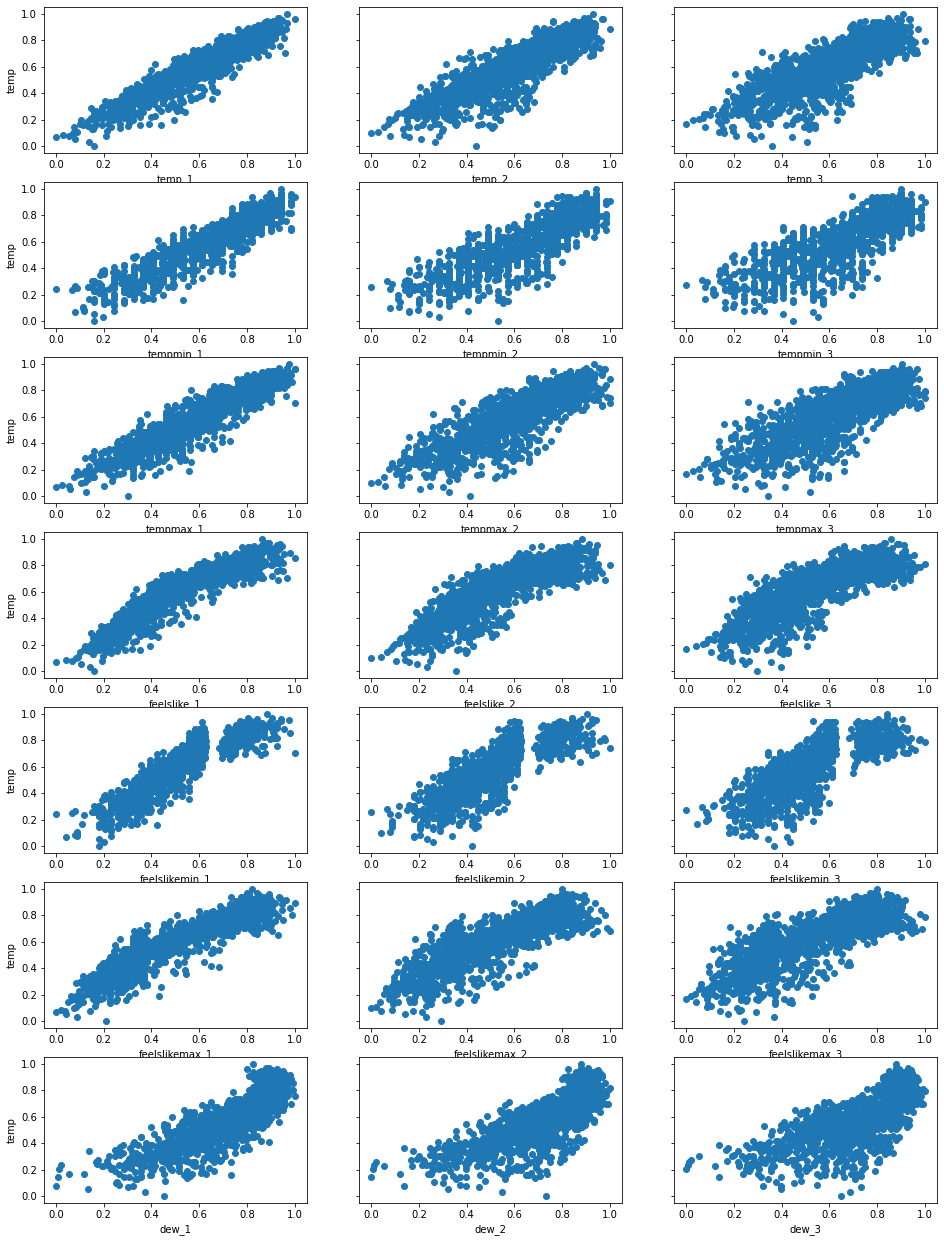

In [ ]:
%matplotlib inline

# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [16, 22]

# call subplots specifying the grid structure we desire and that 
# the y axes should be shared
fig, axes = plt.subplots(nrows=7, ncols=3, sharey=True)

# Since it would be nice to loop through the features in to build this plot
# let us rearrange our data into a 2D array of 6 rows and 3 columns
arr = np.array(predictors).reshape(7, 3)

# use enumerate to loop over the arr 2D array of rows and columns
# and create scatter plots of each meantempm vs each feature
for row, col_arr in enumerate(arr):
    for col, feature in enumerate(col_arr):
        axes[row, col].scatter(df2[feature], df2['temp'])
        if col == 0:
            axes[row, col].set(xlabel=feature, ylabel='temp')
        else:
            axes[row, col].set(xlabel=feature)
plt.show()

In [ ]:
import statsmodels.api as sm

# separate our my predictor variables (X) from my outcome variable y
X = df2[predictors]
y = df2['temp']

# Add a constant to the predictor variable set to represent the Bo intercept
X = sm.add_constant(X)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [ ]:
# (1) select a significance value
alpha = 0.05

# (2) Fit the model
model = sm.OLS(y, X).fit()

# (3) evaluate the coefficients' p-values
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     664.1
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:34:14   Log-Likelihood:                 2032.1
No. Observations:                1454   AIC:                            -4020.
Df Residuals:                    1432   BIC:                            -3904.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0475      0.013      3.733      0.000       0.023       0.073
temp_1             1.2060      0.145      8.290      0.000       0.921       1.491
temp_2            -0.4262      0.157     -2.718      0.007      -0.734      -0.119
temp_3             0.3364      0.145      2.315      0.021       0.051       0.621
tempmin_1          0.0515      0.076      0.677      0.499      -0.098       0.201
tempmin_2         -0.0758      0.078     -0.970      0.332      -0.229       0.078
tempmin_3          0.0308      0.074      0.415      0.678      -0.115       0.177
tempmax_1         -0.0011      0.085     -0.012      0.990      -0.169       0.166
tempmax_2         -0.0951      0.088     -1.079      0.281      -0.268       0.078
tempmax_3         -0.1800      0.085     -2.116      0.035      -0.347      -0.013
feelslike_1       -0.3016      0.102     -2.962      0.003      -0.501      -0.102
feelslike_2        0.3617      0.113      3.193      0.001       0.139       0.584
feelslike_3        0.0192      0.103      0.186      0.853      -0.183       0.222
feelslikemin_1     0.0451      0.060      0.747      0.455      -0.073       0.164
feelslikemin_2    -0.0801      0.062     -1.284      0.200      -0.202       0.042
feelslikemin_3    -0.1007      0.059     -1.692      0.091      -0.217       0.016
feelslikemax_1     0.0004      0.067      0.005      0.996      -0.130       0.131
feelslikemax_2    -0.0083      0.070     -0.118      0.906      -0.145       0.129
feelslikemax_3     0.0934      0.067      1.403      0.161      -0.037       0.224
dew_1              0.2429      0.035      6.994      0.000       0.175       0.311
dew_2             -0.2366      0.046     -5.168      0.000      -0.326      -0.147
dew_3              0.0360      0.036      0.998      0.318      -0.035       0.107
==============================================================================
Omnibus:                      284.138   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              626.759
Skew:                          -1.096   Prob(JB):                    7.96e-137
Kurtosis:                       5.353   Cond. No.                         447.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X = X.drop('feelslikemax_1', axis=1)

# (5) Fit the model 
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     697.8
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:34:44   Log-Likelihood:                 2032.1
No. Observations:                1454   AIC:                            -4022.
Df Residuals:                    1433   BIC:                            -3911.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0475      0.012      3.893      0.000       0.024       0.071
temp_1             1.2056      0.125      9.641      0.000       0.960       1.451
temp_2            -0.4262      0.156     -2.725      0.007      -0.733      -0.119
temp_3             0.3364      0.145      2.316      0.021       0.051       0.621
tempmin_1          0.0516      0.071      0.725      0.469      -0.088       0.191
tempmin_2         -0.0758      0.078     -0.970      0.332      -0.229       0.078
tempmin_3          0.0308      0.074      0.415      0.678      -0.115       0.177
tempmax_1         -0.0007      0.060     -0.012      0.990      -0.118       0.116
tempmax_2         -0.0952      0.087     -1.095      0.274      -0.266       0.075
tempmax_3         -0.1801      0.085     -2.119      0.034      -0.347      -0.013
feelslike_1       -0.3013      0.075     -4.000      0.000      -0.449      -0.154
feelslike_2        0.3617      0.113      3.205      0.001       0.140       0.583
feelslike_3        0.0192      0.103      0.186      0.853      -0.183       0.221
feelslikemin_1     0.0450      0.055      0.816      0.414      -0.063       0.153
feelslikemin_2    -0.0801      0.062     -1.284      0.199      -0.202       0.042
feelslikemin_3    -0.1006      0.059     -1.693      0.091      -0.217       0.016
feelslikemax_2    -0.0082      0.067     -0.122      0.903      -0.140       0.123
feelslikemax_3     0.0935      0.066      1.406      0.160      -0.037       0.224
dew_1              0.2430      0.034      7.198      0.000       0.177       0.309
dew_2             -0.2367      0.046     -5.199      0.000      -0.326      -0.147
dew_3              0.0360      0.036      1.000      0.318      -0.035       0.107
==============================================================================
Omnibus:                      284.119   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              626.686
Skew:                          -1.096   Prob(JB):                    8.26e-137
Kurtosis:                       5.353   Cond. No.                         428.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X = X.drop('tempmax_1', axis=1)

# (5) Fit the model 
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     735.0
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:35:03   Log-Likelihood:                 2032.1
No. Observations:                1454   AIC:                            -4024.
Df Residuals:                    1434   BIC:                            -3919.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0475      0.012      4.014      0.000       0.024       0.071
temp_1             1.2044      0.081     14.949      0.000       1.046       1.362
temp_2            -0.4259      0.155     -2.746      0.006      -0.730      -0.122
temp_3             0.3363      0.145      2.317      0.021       0.052       0.621
tempmin_1          0.0520      0.063      0.821      0.412      -0.072       0.176
tempmin_2         -0.0759      0.078     -0.974      0.330      -0.229       0.077
tempmin_3          0.0308      0.074      0.415      0.678      -0.115       0.177
tempmax_2         -0.0953      0.086     -1.105      0.269      -0.265       0.074
tempmax_3         -0.1800      0.085     -2.120      0.034      -0.347      -0.013
feelslike_1       -0.3013      0.075     -4.003      0.000      -0.449      -0.154
feelslike_2        0.3617      0.113      3.206      0.001       0.140       0.583
feelslike_3        0.0192      0.103      0.186      0.852      -0.183       0.221
feelslikemin_1     0.0450      0.055      0.817      0.414      -0.063       0.153
feelslikemin_2    -0.0800      0.062     -1.286      0.199      -0.202       0.042
feelslikemin_3    -0.1006      0.059     -1.693      0.091      -0.217       0.016
feelslikemax_2    -0.0082      0.067     -0.122      0.903      -0.140       0.123
feelslikemax_3     0.0934      0.066      1.407      0.160      -0.037       0.224
dew_1              0.2430      0.034      7.232      0.000       0.177       0.309
dew_2             -0.2367      0.045     -5.209      0.000      -0.326      -0.148
dew_3              0.0360      0.036      1.000      0.317      -0.035       0.107
==============================================================================
Omnibus:                      284.077   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              626.569
Skew:                          -1.096   Prob(JB):                    8.75e-137
Kurtosis:                       5.353   Cond. No.                         413.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X = X.drop('feelslikemax_2', axis=1)

# (5) Fit the model 
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     776.4
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:35:12   Log-Likelihood:                 2032.1
No. Observations:                1454   AIC:                            -4026.
Df Residuals:                    1435   BIC:                            -3926.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0479      0.011      4.217      0.000       0.026       0.070
temp_1             1.2054      0.080     15.030      0.000       1.048       1.363
temp_2            -0.4173      0.138     -3.028      0.003      -0.688      -0.147
temp_3             0.3353      0.145      2.315      0.021       0.051       0.619
tempmin_1          0.0510      0.063      0.813      0.417      -0.072       0.174
tempmin_2         -0.0788      0.074     -1.063      0.288      -0.224       0.067
tempmin_3          0.0310      0.074      0.417      0.677      -0.115       0.177
tempmax_2         -0.1028      0.061     -1.687      0.092      -0.222       0.017
tempmax_3         -0.1782      0.084     -2.132      0.033      -0.342      -0.014
feelslike_1       -0.3022      0.075     -4.039      0.000      -0.449      -0.155
feelslike_2        0.3537      0.092      3.855      0.000       0.174       0.534
feelslike_3        0.0202      0.103      0.197      0.844      -0.181       0.222
feelslikemin_1     0.0459      0.054      0.843      0.399      -0.061       0.153
feelslikemin_2    -0.0773      0.058     -1.332      0.183      -0.191       0.037
feelslikemin_3    -0.1009      0.059     -1.699      0.090      -0.217       0.016
feelslikemax_3     0.0911      0.064      1.434      0.152      -0.034       0.216
dew_1              0.2432      0.034      7.252      0.000       0.177       0.309
dew_2             -0.2377      0.045     -5.327      0.000      -0.325      -0.150
dew_3              0.0365      0.036      1.017      0.309      -0.034       0.107
==============================================================================
Omnibus:                      284.259   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              627.499
Skew:                          -1.096   Prob(JB):                    5.50e-137
Kurtosis:                       5.356   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X = X.drop('feelslike_3', axis=1)

# (5) Fit the model 
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     822.6
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:35:15   Log-Likelihood:                 2032.1
No. Observations:                1454   AIC:                            -4028.
Df Residuals:                    1436   BIC:                            -3933.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0482      0.011      4.284      0.000       0.026       0.070
temp_1             1.2064      0.080     15.084      0.000       1.050       1.363
temp_2            -0.4238      0.134     -3.170      0.002      -0.686      -0.162
temp_3             0.3552      0.104      3.419      0.001       0.151       0.559
tempmin_1          0.0505      0.063      0.806      0.420      -0.072       0.173
tempmin_2         -0.0785      0.074     -1.060      0.290      -0.224       0.067
tempmin_3          0.0241      0.066      0.368      0.713      -0.104       0.153
tempmax_2         -0.1027      0.061     -1.687      0.092      -0.222       0.017
tempmax_3         -0.1863      0.073     -2.552      0.011      -0.329      -0.043
feelslike_1       -0.3031      0.075     -4.058      0.000      -0.450      -0.157
feelslike_2        0.3604      0.085      4.229      0.000       0.193       0.527
feelslikemin_1     0.0466      0.054      0.857      0.392      -0.060       0.153
feelslikemin_2    -0.0781      0.058     -1.351      0.177      -0.192       0.035
feelslikemin_3    -0.0936      0.046     -2.017      0.044      -0.185      -0.003
feelslikemax_3     0.0999      0.045      2.221      0.027       0.012       0.188
dew_1              0.2434      0.034      7.260      0.000       0.178       0.309
dew_2             -0.2377      0.045     -5.329      0.000      -0.325      -0.150
dew_3              0.0360      0.036      1.008      0.314      -0.034       0.106
==============================================================================
Omnibus:                      284.393   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.202
Skew:                          -1.097   Prob(JB):                    3.87e-137
Kurtosis:                       5.358   Cond. No.                         302.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X = X.drop('tempmin_3', axis=1)

# (5) Fit the model 
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     874.6
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:35:27   Log-Likelihood:                 2032.0
No. Observations:                1454   AIC:                            -4030.
Df Residuals:                    1437   BIC:                            -3940.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0485      0.011      4.324      0.000       0.026       0.070
temp_1             1.2044      0.080     15.100      0.000       1.048       1.361
temp_2            -0.4233      0.134     -3.168      0.002      -0.685      -0.161
temp_3             0.3784      0.083      4.583      0.000       0.216       0.540
tempmin_1          0.0518      0.063      0.828      0.408      -0.071       0.174
tempmin_2         -0.0715      0.072     -0.999      0.318      -0.212       0.069
tempmax_2         -0.1008      0.061     -1.662      0.097      -0.220       0.018
tempmax_3         -0.1982      0.065     -3.032      0.002      -0.326      -0.070
feelslike_1       -0.3011      0.074     -4.044      0.000      -0.447      -0.155
feelslike_2        0.3563      0.084      4.218      0.000       0.191       0.522
feelslikemin_1     0.0456      0.054      0.839      0.402      -0.061       0.152
feelslikemin_2    -0.0831      0.056     -1.479      0.139      -0.193       0.027
feelslikemin_3    -0.0834      0.037     -2.244      0.025      -0.156      -0.010
feelslikemax_3     0.1008      0.045      2.243      0.025       0.013       0.189
dew_1              0.2425      0.033      7.255      0.000       0.177       0.308
dew_2             -0.2384      0.045     -5.351      0.000      -0.326      -0.151
dew_3              0.0396      0.034      1.151      0.250      -0.028       0.107
==============================================================================
Omnibus:                      283.715   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              625.991
Skew:                          -1.095   Prob(JB):                    1.17e-136
Kurtosis:                       5.354   Cond. No.                         293.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X = X.drop('tempmin_1', axis=1)

# (5) Fit the model 
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     933.0
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:35:30   Log-Likelihood:                 2031.6
No. Observations:                1454   AIC:                            -4031.
Df Residuals:                    1438   BIC:                            -3947.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0470      0.011      4.247      0.000       0.025       0.069
temp_1             1.2386      0.068     18.161      0.000       1.105       1.372
temp_2            -0.4304      0.133     -3.227      0.001      -0.692      -0.169
temp_3             0.3839      0.082      4.665      0.000       0.222       0.545
tempmin_2         -0.0544      0.069     -0.794      0.427      -0.189       0.080
tempmax_2         -0.1031      0.061     -1.701      0.089      -0.222       0.016
tempmax_3         -0.2044      0.065     -3.147      0.002      -0.332      -0.077
feelslike_1       -0.3245      0.069     -4.715      0.000      -0.460      -0.190
feelslike_2        0.3648      0.084      4.352      0.000       0.200       0.529
feelslikemin_1     0.0792      0.036      2.202      0.028       0.009       0.150
feelslikemin_2    -0.0963      0.054     -1.788      0.074      -0.202       0.009
feelslikemin_3    -0.0851      0.037     -2.296      0.022      -0.158      -0.012
feelslikemax_3     0.1043      0.045      2.333      0.020       0.017       0.192
dew_1              0.2521      0.031      8.047      0.000       0.191       0.314
dew_2             -0.2395      0.045     -5.379      0.000      -0.327      -0.152
dew_3              0.0389      0.034      1.130      0.258      -0.029       0.106
==============================================================================
Omnibus:                      288.800   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              647.059
Skew:                          -1.107   Prob(JB):                    3.11e-141
Kurtosis:                       5.405   Cond. No.                         276.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X = X.drop('tempmin_2', axis=1)

# (5) Fit the model 
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     999.9
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:35:33   Log-Likelihood:                 2031.3
No. Observations:                1454   AIC:                            -4033.
Df Residuals:                    1439   BIC:                            -3953.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0469      0.011      4.238      0.000       0.025       0.069
temp_1             1.2357      0.068     18.147      0.000       1.102       1.369
temp_2            -0.4961      0.104     -4.750      0.000      -0.701      -0.291
temp_3             0.3742      0.081      4.599      0.000       0.215       0.534
tempmax_2         -0.0807      0.054     -1.504      0.133      -0.186       0.025
tempmax_3         -0.1914      0.063     -3.046      0.002      -0.315      -0.068
feelslike_1       -0.3247      0.069     -4.718      0.000      -0.460      -0.190
feelslike_2        0.3854      0.080      4.835      0.000       0.229       0.542
feelslikemin_1     0.0831      0.036      2.334      0.020       0.013       0.153
feelslikemin_2    -0.1238      0.041     -3.001      0.003      -0.205      -0.043
feelslikemin_3    -0.0807      0.037     -2.201      0.028      -0.153      -0.009
feelslikemax_3     0.0958      0.043      2.207      0.027       0.011       0.181
dew_1              0.2519      0.031      8.041      0.000       0.190       0.313
dew_2             -0.2457      0.044     -5.603      0.000      -0.332      -0.160
dew_3              0.0372      0.034      1.084      0.279      -0.030       0.105
==============================================================================
Omnibus:                      288.660   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              646.814
Skew:                          -1.106   Prob(JB):                    3.52e-141
Kurtosis:                       5.405   Cond. No.                         226.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X = X.drop('dew_3', axis=1)

# (5) Fit the model 
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     1077.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:35:36   Log-Likelihood:                 2030.7
No. Observations:                1454   AIC:                            -4033.
Df Residuals:                    1440   BIC:                            -3960.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0508      0.010      4.866      0.000       0.030       0.071
temp_1             1.2272      0.068     18.142      0.000       1.095       1.360
temp_2            -0.4940      0.104     -4.730      0.000      -0.699      -0.289
temp_3             0.4073      0.075      5.399      0.000       0.259       0.555
tempmax_2         -0.0774      0.054     -1.445      0.149      -0.182       0.028
tempmax_3         -0.2149      0.059     -3.643      0.000      -0.331      -0.099
feelslike_1       -0.3170      0.068     -4.631      0.000      -0.451      -0.183
feelslike_2        0.3663      0.078      4.711      0.000       0.214       0.519
feelslikemin_1     0.0840      0.036      2.358      0.019       0.014       0.154
feelslikemin_2    -0.1226      0.041     -2.971      0.003      -0.203      -0.042
feelslikemin_3    -0.0802      0.037     -2.190      0.029      -0.152      -0.008
feelslikemax_3     0.1080      0.042      2.576      0.010       0.026       0.190
dew_1              0.2453      0.031      7.982      0.000       0.185       0.306
dew_2             -0.2145      0.033     -6.481      0.000      -0.279      -0.150
==============================================================================
Omnibus:                      290.107   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              652.232
Skew:                          -1.110   Prob(JB):                    2.34e-142
Kurtosis:                       5.416   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X = X.drop('tempmax_2', axis=1)

# (5) Fit the model 
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     1165.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:35:38   Log-Likelihood:                 2029.7
No. Observations:                1454   AIC:                            -4033.
Df Residuals:                    1441   BIC:                            -3965.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0454      0.010      4.657      0.000       0.026       0.064
temp_1             1.2289      0.068     18.163      0.000       1.096       1.362
temp_2            -0.5912      0.080     -7.401      0.000      -0.748      -0.435
temp_3             0.4366      0.073      6.007      0.000       0.294       0.579
tempmax_3         -0.2392      0.057     -4.227      0.000      -0.350      -0.128
feelslike_1       -0.3250      0.068     -4.761      0.000      -0.459      -0.191
feelslike_2        0.3492      0.077      4.543      0.000       0.198       0.500
feelslikemin_1     0.0917      0.035      2.604      0.009       0.023       0.161
feelslikemin_2    -0.0965      0.037     -2.601      0.009      -0.169      -0.024
feelslikemin_3    -0.0828      0.037     -2.263      0.024      -0.155      -0.011
feelslikemax_3     0.1144      0.042      2.743      0.006       0.033       0.196
dew_1              0.2476      0.031      8.062      0.000       0.187       0.308
dew_2             -0.2079      0.033     -6.340      0.000      -0.272      -0.144
==============================================================================
Omnibus:                      293.883   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              666.383
Skew:                          -1.120   Prob(JB):                    1.98e-145
Kurtosis:                       5.446   Cond. No.                         196.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X.columns

Index(['const', 'temp_1', 'temp_2', 'temp_3', 'tempmax_3', 'feelslike_1',
       'feelslike_2', 'feelslikemin_1', 'feelslikemin_2', 'feelslikemin_3',
       'feelslikemax_3', 'dew_1', 'dew_2'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
X = X.drop('const', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# fit the build the model by fitting the regressor to the training data
regressor.fit(X_train, y_train)

# make a prediction set using the test set
prediction = regressor.predict(X_test)

# Evaluate the prediction accuracy of the model
from sklearn.metrics import mean_absolute_error, median_absolute_error
print("The Explained Variance: %.2f" % regressor.score(X_test, y_test))
print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, prediction))
print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, prediction))

The Explained Variance: 0.90
The Mean Absolute Error: 0.05 degrees celsius
The Median Absolute Error: 0.03 degrees celsius
